### Курсовой проект для курса "Python для Data Science"

In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import model_selection
#import random

from sklearn.tree import DecisionTreeRegressor

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
matplotlib.rcParams.update({'font.size': 14})

**Пути к директориям и файлам**

In [4]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

**Задание:**

Используя данные из обучающего датасета (train.csv), построить модель для предсказания балла на экзамене по математике.
С помощью полученной модели, предсказать балл экзамена из тестового датасета (test.csv).

Целевая переменная:
mean_exam_points

**Метрика качества:**
R2 - коэффициент детерминации

Метрика для оценки – Коэффициент детерминации:

\[ R^2 = 1 - \frac{\sigma^2}{\sigma_y^2} \]

In [5]:
def manual_R2(y, y_pred):
    SS_total = ((y-np.mean(y))**2).sum()
    SS_res = ((y - y_pred)**2).sum()
    return 1 - SS_res / SS_total

### Загрузка данных

In [6]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail(n=3)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
9997,9997,34.0,1.0,1250.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0
9998,9998,33.0,3.0,1100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0
9999,9999,35.0,0.0,1450.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [7]:
train_df.shape

(10000, 12)

In [8]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail(n=3)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
9997,19997,33.0,5.0,1100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,19998,48.0,0.0,1750.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
9999,19999,49.0,5.0,2000.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
test_df.shape

(10000, 11)

In [10]:
train_df.shape[1]-1 == test_df.shape[1]

True

In [11]:
data = pd.concat([train_df, test_df], axis=0)
data = data.reset_index(drop=True)
data.shape

(20000, 12)

In [12]:
x_train = data[data["mean_exam_points"].notnull()]
x_test = data[data["mean_exam_points"].isnull()]

In [13]:
data.head(10)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
5,5,33.0,4.0,1650.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0
6,6,53.0,1.0,2100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0
7,7,60.0,3.0,1800.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
8,8,39.0,1.0,1200.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,57.0
9,9,49.0,5.0,1750.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0


In [14]:
data.tail(n=2)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
19998,19998,48.0,0.0,1750.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
19999,19999,49.0,5.0,2000.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN


### Приведение типов данных

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   20000 non-null  int64  
 1   age                  20000 non-null  float64
 2   years_of_experience  20000 non-null  float64
 3   lesson_price         20000 non-null  float64
 4   qualification        20000 non-null  float64
 5   physics              20000 non-null  float64
 6   chemistry            20000 non-null  float64
 7   biology              20000 non-null  float64
 8   english              20000 non-null  float64
 9   geography            20000 non-null  float64
 10  history              20000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 1.8 MB


In [16]:
data.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,10000.000000
mean,9999.500000,45.925400,1.983400,1698.100000,1.71445,0.378150,0.128200,0.114850,0.054850,0.031750,0.018900,64.340800
std,5773.647028,8.000165,1.777718,524.562578,0.79287,0.484937,0.334321,0.318849,0.227693,0.175338,0.136175,13.536823
min,0.000000,23.000000,0.000000,200.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,4999.750000,41.000000,0.000000,1300.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,9999.500000,46.000000,2.000000,1500.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,14999.250000,51.000000,3.000000,2150.000000,2.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,19999.000000,68.000000,10.000000,4050.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


__Целевая переменная__

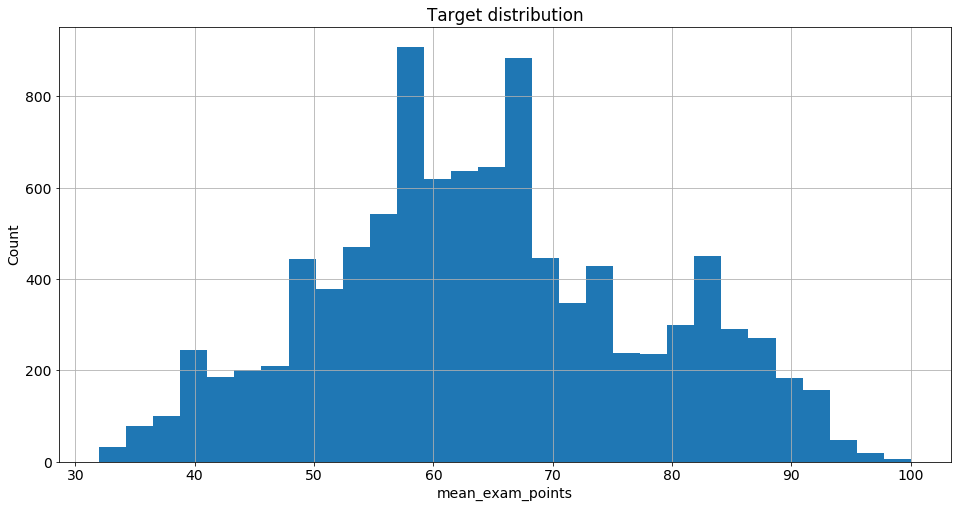

In [17]:
plt.figure(figsize = (16, 8))

train_df['mean_exam_points'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('mean_exam_points')

plt.title('Target distribution')
plt.show()

### Все признаки количественные

In [18]:
data_num_features = data.select_dtypes(include=['float64', 'int64'])
data_num_features.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [19]:
data.isnull().sum() #пропусков нет

Id                         0
age                        0
years_of_experience        0
lesson_price               0
qualification              0
physics                    0
chemistry                  0
biology                    0
english                    0
geography                  0
history                    0
mean_exam_points       10000
dtype: int64

In [20]:
x_train_num_features = x_train.select_dtypes(include=['float64', 'int64'])
x_train_num_features

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,44.0,0.0,1700.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,78.0
9996,9996,51.0,0.0,1700.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0
9997,9997,34.0,1.0,1250.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0
9998,9998,33.0,3.0,1100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0


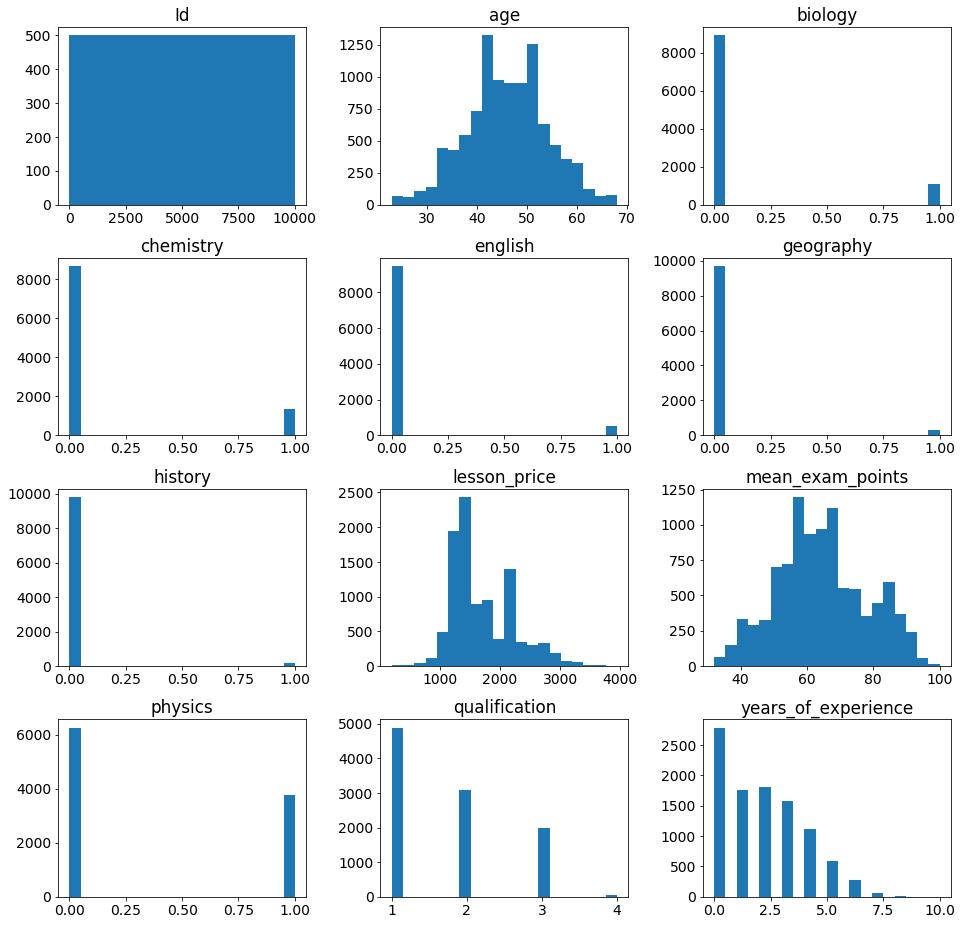

In [21]:
x_train_num_features.hist(figsize=(16,16), bins=20, grid=False);


### Матрица корреляций

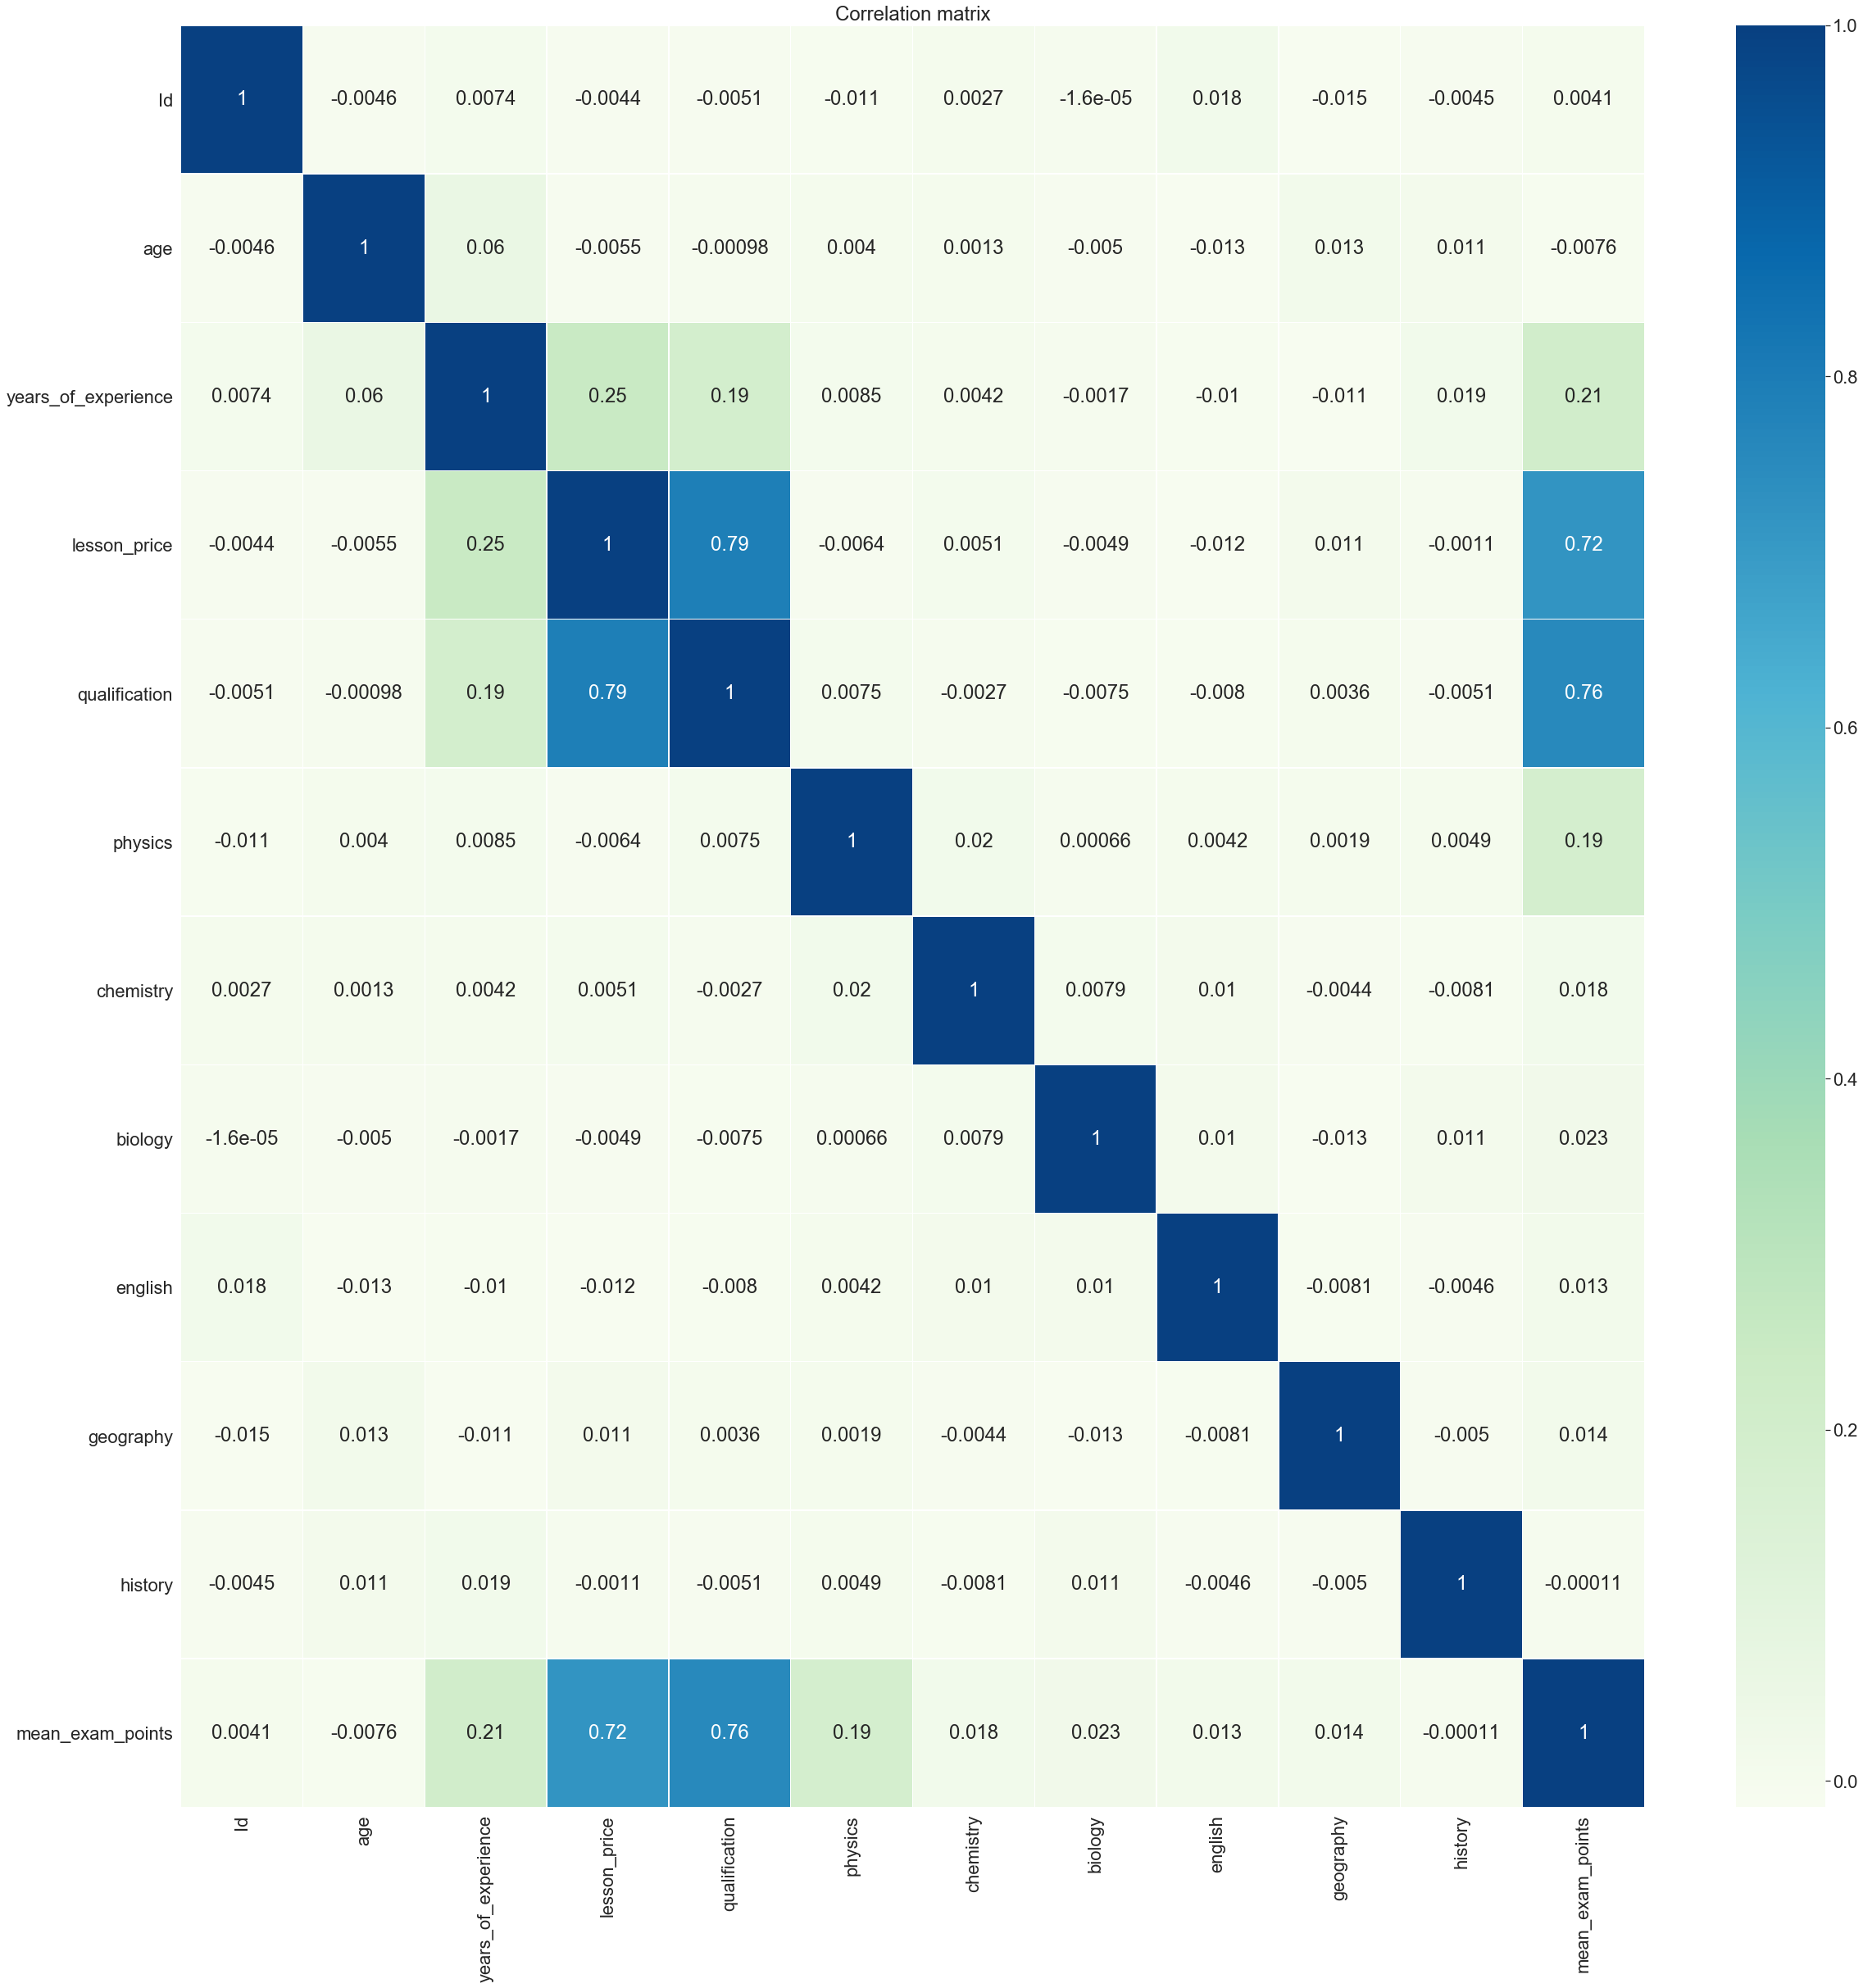

In [22]:
plt.figure(figsize = (40,40))

sns.set(font_scale=2)
sns.heatmap(x_train.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

### Отбор признаков

In [23]:
data.columns.tolist()

['Id',
 'age',
 'years_of_experience',
 'lesson_price',
 'qualification',
 'physics',
 'chemistry',
 'biology',
 'english',
 'geography',
 'history',
 'mean_exam_points']

In [24]:
x_train = data[data["mean_exam_points"].notnull()]
x_test = data[data["mean_exam_points"].isnull()]

In [25]:
x_train.columns.tolist()

['Id',
 'age',
 'years_of_experience',
 'lesson_price',
 'qualification',
 'physics',
 'chemistry',
 'biology',
 'english',
 'geography',
 'history',
 'mean_exam_points']

In [28]:
feature_names = ['age',
                 'years_of_experience',
                 'lesson_price',
                 'qualification',
                 'physics',
                 'chemistry',
                 'biology',
                 'english',
                 'geography',
                 'history'
]
target_name = 'mean_exam_points'

In [30]:
X = x_train[feature_names].values
y = x_train[target_name].values

print(X.shape, y.shape)

(10000, 10) (10000,)


In [31]:
#анализ признаков
for i, f in enumerate(feature_names):
    treeD = DecisionTreeRegressor(max_depth=3, random_state=42)
    treeD.fit(X[:,i].reshape(-1, 1), y)
    print(f)
    y_pred = treeD.predict(X[:,i].reshape(-1, 1))
    print(np.corrcoef(y_pred, y)[0,1])

age
0.03843491722010981
years_of_experience
0.2269519835421786
lesson_price
0.7856303480597092
qualification
0.7729185781400231
physics
0.18772626610245438
chemistry
0.01782512168278317
biology
0.023021603521184115
english
0.013174043125228291
geography
0.014401058035602361
history
0.00011329469909836321


In [32]:
# уберем age как наименее значимый признак (опытным путем убирала age, потом History, и оба вместе, но без age R2 был выше)
feature_names = [#'age',
                 'years_of_experience',
                 'lesson_price',
                 'qualification',
                 'physics',
                 'chemistry',
                 'biology',
                 'english',
                 'geography',
                 'history'
]
target_name = 'mean_exam_points'

In [33]:
# в np.array
X = x_train[feature_names].values
y = x_train[target_name].values

print(X.shape, y.shape)

(10000, 9) (10000,)


### Настройка и оценка финальной модели

Лучше всего отработала модель бустинга, используем ее для предсказания

In [34]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1)

In [35]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [36]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [37]:
def bias(y, z):
    return 2*(y - z)

In [38]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [39]:
n_trees = 20
max_depth = 3
eta = 0.42
coefs = [1] * n_trees

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

train_prediction = gb_predict(X_train, trees, coefs, eta)
print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)} \
    R2 {manual_R2(y_train, train_prediction)}')
test_prediction = gb_predict(X_test, trees, coefs, eta)
print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)} \
    R2 {manual_R2(y_test, test_prediction)}')

Ошибка алгоритма из 20 деревьев глубиной 3     с шагом 0.42 на тренировочной выборке: 38.32091940913384     R2 0.7927527112233052
Ошибка алгоритма из 20 деревьев глубиной 3     с шагом 0.42 на тестовой выборке: 41.25165861079142     R2 0.769822762595398


### Сохранение модели

In [40]:
X # весть трейн без id и age

array([[0.00e+00, 1.40e+03, 1.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [4.00e+00, 2.85e+03, 3.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 1.20e+03, 1.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [1.00e+00, 1.25e+03, 1.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.00e+00, 1.10e+03, 1.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 1.45e+03, 1.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [41]:
# обучим модель на всех данных трейн
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=1)
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
gb_all_prediction = gb_predict(X, trees, coefs, eta)

In [42]:
print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на всем трейне: {mean_squared_error(y, gb_all_prediction)} \
    R2 {manual_R2(y, gb_all_prediction)}')

Ошибка алгоритма из 20 деревьев глубиной 3     с шагом 0.42 на всем трейне: 39.1155877864945     R2 0.7865187266510035


In [43]:
test_df

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,19995,42.0,0.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,19996,51.0,2.0,2200.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
9997,19997,33.0,5.0,1100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,19998,48.0,0.0,1750.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
X_valid_predict = test_df.drop(labels=['Id','age'], axis=1)
X_valid_predict.head()

,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [45]:
valid_answers = gb_predict(X_valid_predict.values, trees, coefs, eta)
result = pd.DataFrame({'Id':test_df['Id'], 'mean_exam_points':valid_answers.round(decimals=3)})

In [46]:
result

,Id,mean_exam_points
0,10000,54.521
1,10001,62.124
2,10002,50.709
3,10003,90.822
4,10004,89.403
...,...,...
9995,19995,40.464
9996,19996,80.256
9997,19997,53.710
9998,19998,64.111


In [47]:
result.to_csv(f'Sbitneva_predictions_regression.csv', index=None)